In [1]:
]activate calculations 

  Activating project at `~/spinGlasses/calculations`


# Setup

In [2]:
using calculations
using Revise
using Plots; gr()

using LaTeXStrings
using Statistics
using ColorSchemes

function norm(arr)
    arrNorm = sum(abs.(arr))
    arrNorm
end;

In [3]:
calculations.nPoints = 500;
calculations.nBonds = 12500;
calculations.sigma = 1;

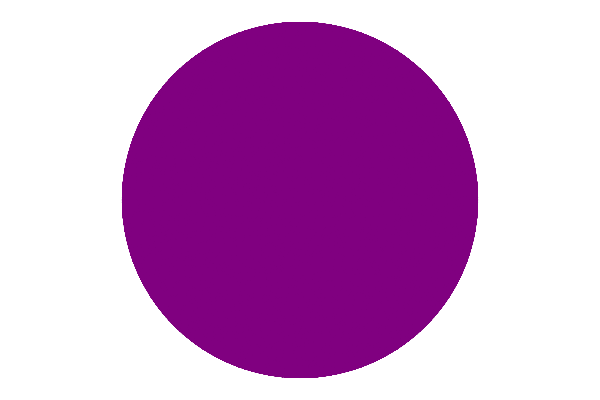

In [4]:
plot!(size=(750, 750))

connectionsArray = calculations.bigPlotFunction(); plot!()

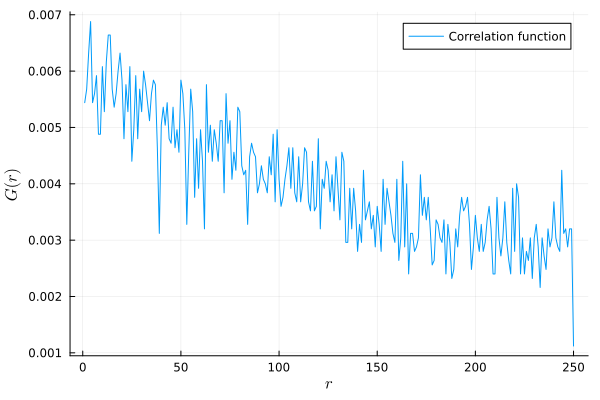

In [5]:
plot(calculations.correlationFunction(connectionsArray), label="Correlation function")
plot!(xlabel=L"r", ylabel=L"$G(r)$")

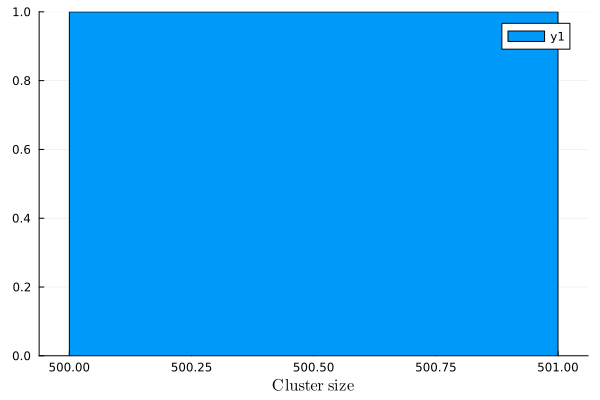

In [6]:
connectionArray = calculations.connectionSetToConnectivityArrayConversion(connectionsArray);
clusters = calculations.clusterIdentification(connectionArray);
clusterSizes = [];
for cluster in clusters
    push!(clusterSizes, length(cluster))
end

histogram(clusterSizes, xlabel=L"\textrm{Cluster\ size}")

In [7]:

calculations.nPoints = 50
nBondsArray = 50:25:200
sigmaArray = [-0.95, 0, 5]

plt = plot(layout = (1, length(sigmaArray)), size=(900, 300), bottom_margin=15Plots.mm, legend=false, grid=false, ylims=(0,0.5))

for (index, sigma) in enumerate(sigmaArray)
    calculations.sigma = sigma
    
    meanNClusters = []
    varNClusters = []

    plot!(title="$(calculations.nPoints) nodes, σ = $(calculations.sigma)", sp=index)
    
    for nbonds in nBondsArray
    calculations.nBonds = nbonds
    y = calculations.clusterSizeStatistics(100)
    yNorm = norm(y[1])
        
    plot!(y[1]/yNorm, ribbon=y[2]/yNorm/2, label="$(calculations.nBonds) bonds", sp=index, legend=(index==2))
        
    plot!(legendcols=length(nBondsArray))
    
    nClusters = calculations.clusterCountStatistics(100)
    push!(meanNClusters, nClusters[1])
    push!(varNClusters, nClusters[2])
    end
    
plot!(xlabel=L"\textrm{Cluster\ size}", sp=index)

end
plot!()

savefig("figures/clusterSizeDistribution.pdf")


"/home/dein/spinGlasses/figures/clusterSizeDistribution.pdf"

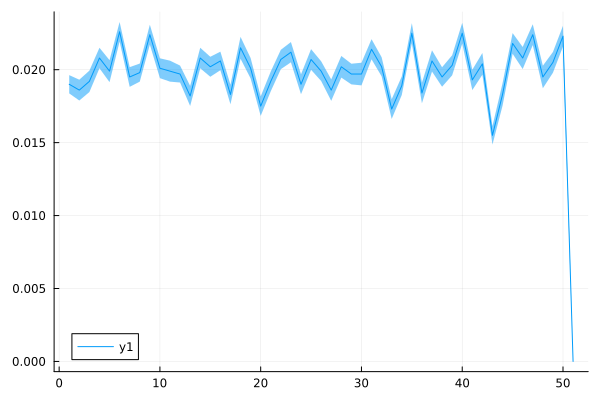

In [8]:
plot()

calculations.sigma = -1
calculations.nPoints = 101
calculations.nBonds = 100
y = calculations.correlationFunctionStatistics(100)

plot!(y[1], ribbon=y[2]/2)
plot!()